In [1]:
# Para variables categóricas, en que Xi tome 2 posibles valores, defino una función lineal por tramos,
# donde Xi = 0 para cuando se es hombre, y Xi = 1 cuando es mujer

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../python-ml-course/datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485
...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856


In [4]:
# Gender y city tier son categorías, por lo que creamos variables dummy

In [5]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City Tier")

In [6]:
dummy_city_tier

,City Tier_Tier 1,City Tier_Tier 2,City Tier_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
2357,0,1,0
2358,0,1,0
2359,0,0,1
2360,1,0,0


In [7]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [8]:
# Creé dataframes dummy para cada variable categórica

In [9]:
column_names = df.columns.values.tolist()

In [10]:
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [11]:
# Voy a concatenar los dataframes:
df_new1 = df[column_names].join(dummy_gender)
df_new1

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0


In [12]:
column_names = df_new1.columns.values.tolist()
df_new2 = df_new1[column_names].join(dummy_city_tier)

In [13]:
df_new2.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City Tier_Tier 1,City Tier_Tier 2,City Tier_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [14]:
# Concatenamos nuestros dataframes vamos a sacar un modelo lineal solo con las varuiables que me interesan:

feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", "City Tier_Tier 1", 
                "City Tier_Tier 2", "City Tier_Tier 3", "Record"]

In [15]:
df_new = df_new2

In [16]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(lm.intercept_)

-79.41713030136816


In [20]:
lm.coef_

array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
        7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02])

In [21]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205733),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Female', -131.0250132555464),
 ('Gender_Male', 131.02501325554658),
 ('City Tier_Tier 1', 76.76432601049548),
 ('City Tier_Tier 2', 55.138974309232275),
 ('City Tier_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445638)]

In [22]:
# Ojo que gender male y female son opuestos lo que está bine

In [23]:
# La suma de los city tier =0

In [24]:
lm.score(X,Y)

0.9179923586131016

In [25]:
# R2 muy bueno! 0.91

In [26]:
# El modelo puede ser escrito como:
# Total_Spend = Intercept + X1*COEF1 + X2*COEF2 + .. + Xi*COEFi

# O puedo usar el predict del modelo lineal. Esto me calculará el valor predicho por el modelo para cada set X.
df_new["predict"] = lm.predict(X)

In [27]:
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City Tier_Tier 1,City Tier_Tier 2,City Tier_Tier 3,predict
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0,3336.456655
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0,8069.348522
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1,9050.690358
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0,8220.596094


In [28]:
# Calculemos la suma de cuadrado de errores para establecer la desviación típica de los residuos
SSD = np.sum((df_new["predict"] - df_new["Total Spend"])**2)

In [29]:
SSD

1517733985.3408158

In [30]:
# Vamos a calcular la desviación típica de los residuos. Recordar que hay que restar el número de variables pred -1
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [31]:
RSE

803.1318809818164

In [32]:
sales_mean = np.mean(df_new["Total Spend"])
error = RSE/sales_mean

In [33]:
error

0.1303113568029416

In [34]:
# EL modelo no puede explicar el 13% de los datos.
# Sales mean es 6163 Euros. Y la desviacion es de 803 euros (800 euros arriba y 800 abajo)
# Es bastante poco con respecto a la media. Un error medianamente aceptable.

In [35]:
# La forma correcta de escribir el modelo es una función por tramos, por lo que
# escribir el modelo como Intercept + X1*COEF1 + X2*COEF2 + .. + Xi*COEFi no es correcto. Debe escribirse como:

# Si es hombre y vive en City1: bla bla
# Si es hombre y vive en citi2: bla bla
# Si es hombre y vive en city3: bla bla
# Si es mujer y vive en City1: - bla bla
# Si es mujer y vive en citi2: - bla bla
# Si es mujer y vive en city3: - bla bla
  
# El - en mujer es porque el coeficiente que acompaña a hombre es el negativo en la mujer, por supuesto
# que los bla son el resto de la formula

In [36]:
# solo se requiere n-1 variables para una variable categorida de n niveles, ya que de hombre podemos inferir mujer.
# m + H = 0
# c1 + c2 + c3 = 0

# ELIMINAR VARIABLES DUMMY REDUNDANTES

In [37]:
# nos vamos a quedar solo con las columnas de la 1 en adelante de gender:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]

In [38]:
dummy_gender

,Gender_Male
0,0
1,0
2,1
3,0
4,0
...,...
2357,1
2358,1
2359,0
2360,0


In [39]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]

In [40]:
dummy_city_tier

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


In [41]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)

In [42]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [43]:
# Por cada variable categórica de N niveles tenemos N-1 variables dummy agregada al dataset. Si vive en citi1
# y es mujer, la parte final sería 0, 0, 0

# Calculamos nuevamente todo:

In [44]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]

In [45]:
X = df_new[feature_cols]

In [46]:
Y = df_new["Total Spend"]

In [47]:
lm = LinearRegression()

In [48]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
print(lm.intercept_)

-133.67781754642238


In [50]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205735),
 ('Transaction Time', 0.15494612549589748),
 ('Gender_Male', 262.05002651109527),
 ('City_Tier 2', -21.625351701262765),
 ('City_Tier 3', -208.66762633022327),
 ('Record', 772.2334457445639)]

In [51]:
# Cambiaron los coeficientes y el intercept, pero el modelo sigue siendo el mismo: R2
lm.score(X,Y)

0.9179923586131016

Antes, con todas las variables dummy:
[('Monthly Income', 0.14753898049205733),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Female', -131.0250132555464),
 ('Gender_Male', 131.02501325554658),
 ('City Tier_Tier 1', 76.76432601049548),
 ('City Tier_Tier 2', 55.138974309232275),
 ('City Tier_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445638)]
 
 Luego, con las variables dummy enmascaradas:
 [('Monthly Income', 0.14753898049205735),
 ('Transaction Time', 0.15494612549589748),
 ('Gender_Male', 262.05002651109527),
 ('City_Tier 2', -21.625351701262765),
 ('City_Tier 3', -208.66762633022327),
 ('Record', 772.2334457445639)]
 
 Todos iguales, excepto Gender y City:
 - Antes:
 - CT1 = 76, CT2 = 55, CT3 = -131
 - Después (resto 76 a todos)
 - CT1 = 0, CT2 = -21, CT3 = -208

In [52]:
# La relación entre la variable de salida y una de las variables no necesariamnte es lineal
# Para verificar la relación entre Y y Xi, para todo i, se puede asumir que Y relaciona linealmente
# para todo Xi

import pandas as pd
data_auto = pd.read_csv('../python-ml-course/datasets/auto/auto-mpg.csv')

In [53]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [54]:
# mpg es millas por galeón

# cuánta info tenemos?
data_auto.shape

(406, 9)

In [55]:
# vamos a eliminar los N/A

import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

In [57]:
data_auto["mpg"] = data_auto["mpg"].dropna()

In [58]:
data_auto["horsepower"] = data_auto["horsepower"].dropna()

Text(0.5, 1.0, 'CV vs MPG')

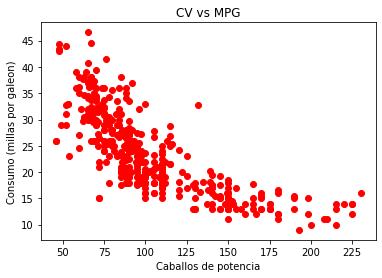

In [59]:
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galeon)")
plt.title("CV vs MPG")

### Modelo de regresión lineal
- mpg = a + b * horsepower

In [60]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
x_data = X[:, np.newaxis]

In [61]:
lm = LinearRegression()
lm.fit(x_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
type(X)

pandas.core.series.Series

In [63]:
type(x_data)

numpy.ndarray

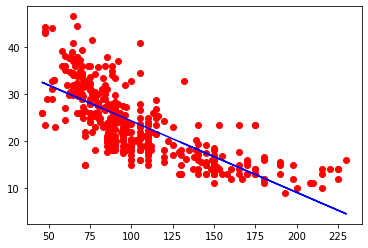

In [64]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(x_data), color = "blue")

In [65]:
lm.score(x_data, Y)

0.574653340645025

In [66]:
SSD = np.sum((Y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data)-1))

In [67]:
y_mean = np.mean(Y)

In [68]:
error = RSE/y_mean

In [69]:
SSD, RSE, y_mean, error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

In [70]:
# haríamos 23.5 millas con 1 galeón, +-5 millas. y un error del 21%

# me quedé en la clase 93, en la mitad. Justo antes del modelo de regresión cuadrático.

# Utilizamos un modelo lineal para estimar los datos. Anda bien pero podríamos probar un modelo cuadrático.. porque si...

In [74]:
# mpg = a + b * horsepower**2

In [75]:
x_data = X**2

In [76]:
x_data = x_data[:,np.newaxis]

In [78]:
lm = LinearRegression()
lm.fit(x_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
lm.score(x_data, Y)

0.4849887034823205

In [80]:
# Ha bajado un poco el R2. Tenemos aún margen de mejora
# Hacemos la predicción de factores:

In [81]:
SSD = np.sum((Y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

In [82]:
# El error aumentó en relación al modelo linea. porque pasamos de 21% al 23% de error.

# Vamos a intentar un mopdelo de regresión lineal y cuadrático

# mpg = a + b horsepower + c horsepower**2

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [89]:
# Vamos a hacer un modelo de un polinomio completo de grado 2 (a+bx+cx**2)
poly = PolynomialFeatures(degree = 2)
x_data = poly.fit_transform(X[:,np.newaxis])

In [90]:
lm = linear_model.LinearRegression()

In [91]:
lm.fit(x_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
lm.score(x_data, Y)

0.6439066584257469

In [93]:
# Aumentó un poco el R2 en relación al lineal y al cuadratico.
SSD = np.sum((Y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(8636.1806435245, 4.617781158036539, 23.51457286432162, 19.637954661906885)

In [94]:
# y tenemos un error del 19%!
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

In [96]:
lm.intercept_


55.02619244708117

In [97]:
# finalmente, nuestro modelo es:
# mpg = 55.026 + -0.434 * horsepower + 0.0011* horsepower**2

In [104]:
# Vamos a hacer un modelo de un polinomio completo para grados de 2 a 5
for d in range(2,6):
    poly = PolynomialFeatures(degree = d)
    x_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(x_data, Y)
    print("Regresión de grado "+str(d))
    print(lm.score(x_data, Y))
    print(lm.intercept_)
    print(lm.coef_)
    print("")
    SSD = np.sum((Y - lm.predict(x_data))**2)
    RSE = np.sqrt(SSD/(len(x_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print(SSD, RSE, y_mean, error*100)

Regresión de grado 2
0.6439066584257469
55.02619244708117
[ 0.         -0.43404318  0.00112615]

8636.1806435245 4.617781158036539 23.51457286432162 19.637954661906885
Regresión de grado 3
0.6444678885560742
58.44877411167265
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]

8622.569367428552 4.614140736300908 23.51457286432162 19.622473106036676
Regresión de grado 4
0.6467674189704503
40.09664386278185
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]

8566.79983249135 4.599194731579757 23.51457286432162 19.558912501268775
Regresión de grado 5
0.6547512491818561
-40.69399193581289
[ 0.00000000e+00  4.00021892e+00 -7.54802466e-02  6.19621640e-04
 -2.36220984e-06  3.41983064e-09]

8373.171387690587 4.546921733827953 23.51457286432162 19.336612066328208


In [105]:
# Vemos que el R2 no aumenta tanto, dado el aumento en la complejidad del modelo, 
# por lo que siempre preferiremos qudanos con el polinomio más sencillo

# El problema de los outliers:
Datos que se alejan mucho de la tendencia.
Cuando hay un outlier eliminarlo o tratarlo adecuadamente en el modelo.

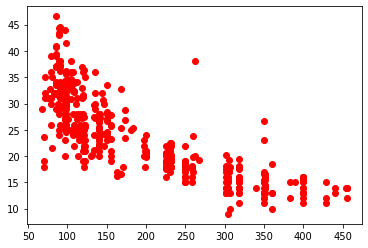

In [109]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [107]:
# siempre que encontremos este tipo de datos, primero hacer el modelo con los outliers y luego sin ellos.

In [113]:
#tratamiento de variables para eliminar NA
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
lm.score(X, Y)

0.6261049762826918

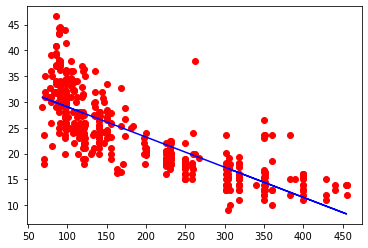

In [118]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color = "blue")

In [124]:
# buen factor de R2.
# veamos como mejora o empeora el modelo si quito los outliers.


# Vamos a tratar de filtrar el dato:
data_auto[(data_auto["displacement"] > 250) & (data_auto["mpg"] > 35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [125]:
data_auto[(data_auto["displacement"] > 300) & (data_auto["mpg"] > 20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [126]:
# Quitamos los outliers por ID
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [129]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
lm.score(X,Y)

0.6466514317531822

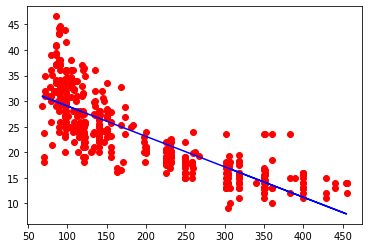

In [131]:
# Me aumenta un poco el R2
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color = "blue")

In [132]:
# los boxplot tb sirven mucho para ver outliers
# cualquier valor que se salga de 1.5 veces el intervalo intercuantil por debajo del 
# 1er cuartil o por encima del 3ro, es clasificado automaticamente como outlier

# La otra opción es en base al error. Nosotros definimos un error máximo y los quitamos

# Consideraciones de modelos lineales
- La distribución de los residuos debe distribuir normal!
- Sin patrones (no deben poder ser estimados)
- Simetricamente distribuidos (normal)

Si no se cumplen condiciones anteriores:
- La relación entre variables no es lineal
- hey outliers en el datase
- existen valores con predicción muy elevados

Hay que tener en consideracion la varianza no constrante en los terminos de error:
- Heterocedasticidad (forma de embudo). La varianza no es constante -> se puede solucionar con una función cóncava en la variable de salida. En lugar de predecir la variable directa, trataremos de predecir su sqrt o su logaritmo.
- Homocedasticidad (paralela). Varianza es constante.

Puntos con elevado apalancamiento
 - Tene un valor muy alto en la variable de partida. Los podemos quitar como outliers para quitarlos del dataset
 - Para indentificarlos:
 leverage_i = 1/n + ((x_i - x_mean)**2)/(sum(x_i-x_mean)**2)
 
 "cuánto pesa la dila iésima con respecto al promedio"
 
 Se eliminan las filas con mayores indices de leverage.